In [1]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
#LOAD DATA
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)

In [7]:
#view first six rows of dataset
data[0:6]

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572


In [8]:
#find total observations in dataset
len(data.index)

10000

In [9]:
#FIT LOGISTIC REGRESSION MODEL
X = data[['student', 'balance','income']]
y = data['default']

In [10]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [11]:
#instantiate the model
log_regression = LogisticRegression()

In [12]:
#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

In [13]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [14]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9633333333333334


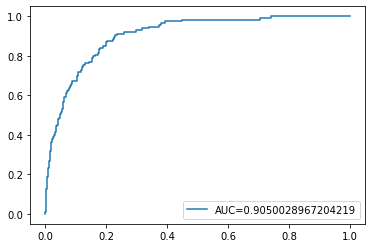

In [15]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()